In [57]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [192]:
# Read an image
img_path = "../images/"
img_name = "circles_3.jfif"
img = cv.imread(img_path + img_name, cv.IMREAD_GRAYSCALE)
cv.imwrite(img_path + img_name.rpartition('.')[0] + "_grayscale.jpg", img)
img.shape

(667, 1000)

In [172]:
# Reduce the size of image
n_rows, n_cols = img.shape[:2]
x_scale = 0.3
y_scale = 0.3
img = cv.resize(img, (int(n_cols * x_scale), int(n_rows * y_scale)), interpolation=cv.INTER_CUBIC)
img.shape

(720, 900)

(-0.5, 630.5, 468.5, -0.5)

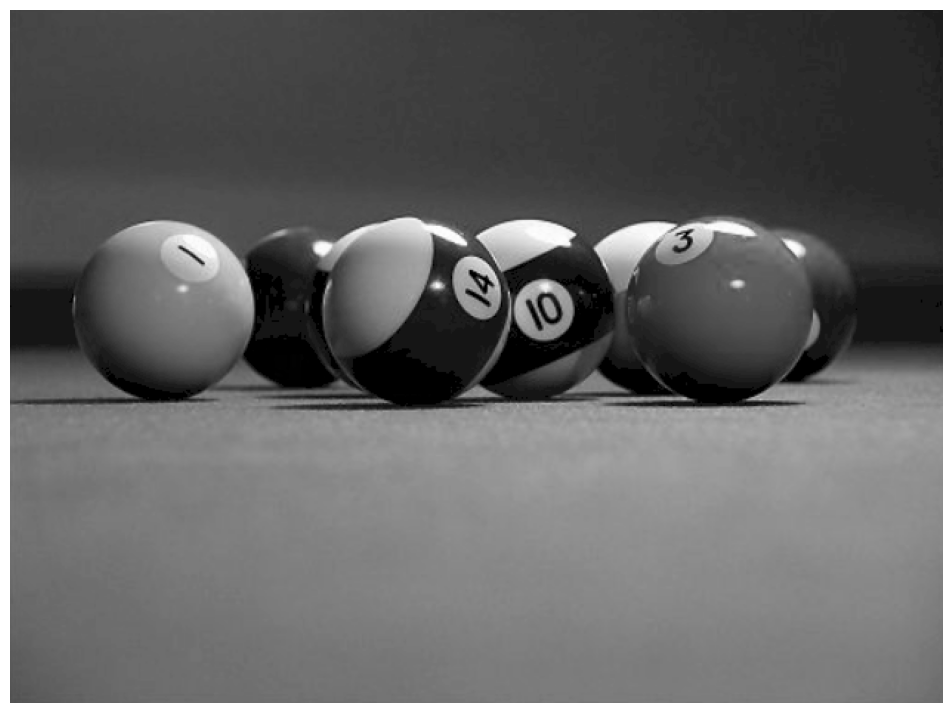

In [178]:
# Show image
fig = plt.figure(figsize=(13, 9))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')

True

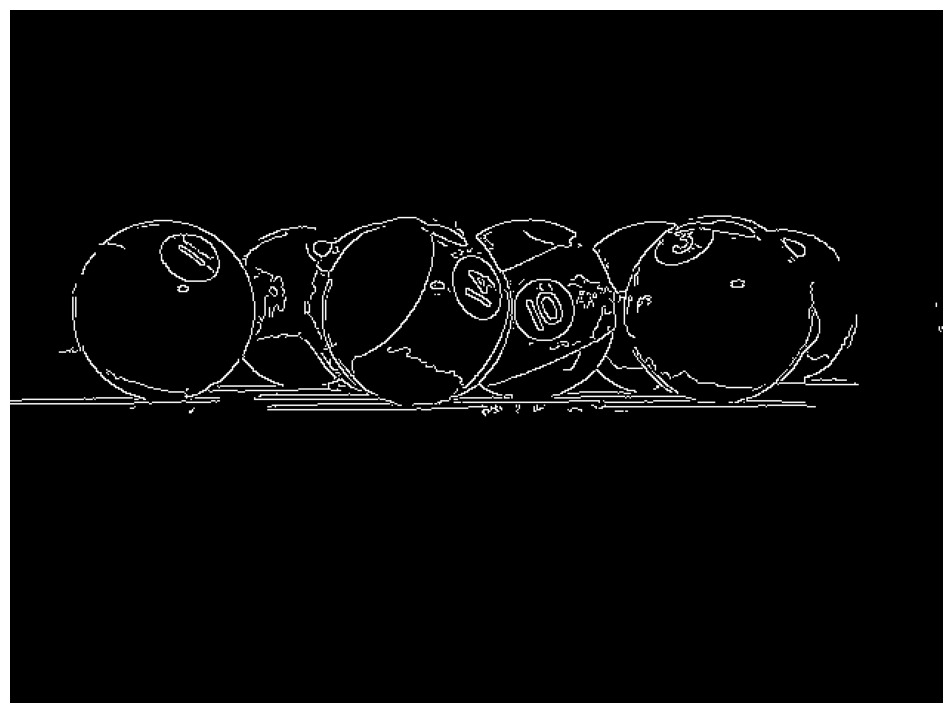

In [123]:
# Apply Canny algorithm
img_edge = cv.Canny(img, 50, 100, None, 3)
fig = plt.figure(figsize=(13, 9))
plt.imshow(cv.cvtColor(img_edge, cv.COLOR_BGR2RGB))
plt.axis('off')
cv.imwrite(img_path + img_name.rpartition('.')[0] + '_canny.jpg', img_edge)

In [205]:
# Apply filtering
#img = cv.GaussianBlur(img, (7, 7), sigmaX=1.5, borderType=cv.BORDER_REFLECT)
# Apply standard Hough transform for finding circles
circles = cv.HoughCircles(image=img, method=cv.HOUGH_GRADIENT_ALT, dp=1.5, minDist=10, param1=300, param2=0.7, minRadius=60, maxRadius=65)
len(circles[0])

3

True

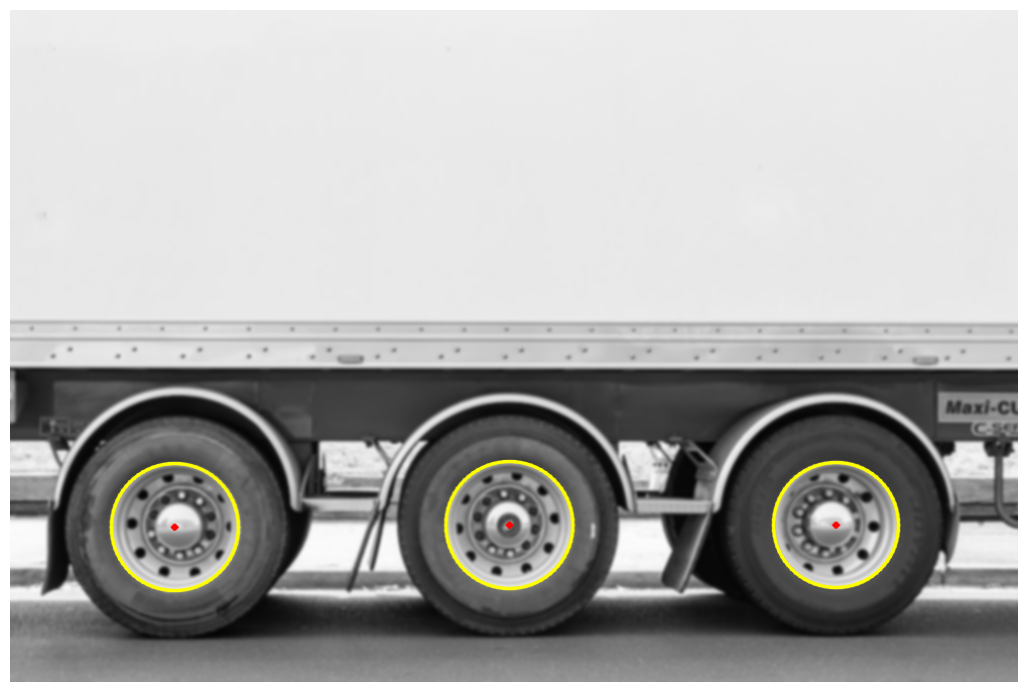

In [206]:
# Display lines
img_out = cv.cvtColor(img, cv.COLOR_GRAY2BGR).copy()
if circles is not None:
    for i in range(0, len(circles[0])):
        c = (circles[0][i]).astype(np.int32)
        cv.circle(img_out, (c[0], c[1]), radius=c[2], color=(0, 255, 255), thickness=2, lineType=cv.LINE_AA)
        cv.circle(img_out, (c[0], c[1]), radius=2, color=(0, 0, 255), thickness=2, lineType=cv.LINE_AA)
fig = plt.figure(figsize=(13, 9))
plt.imshow(cv.cvtColor(img_out, cv.COLOR_BGR2RGB))
plt.axis('off')

cv.imwrite(img_path + img_name.rpartition('.')[0] + '_circles.jpg', img_out)

In [197]:
print(len(circles[0]))
print(np.max(circles[0][:, 2]))
print(np.min(circles[0][:, 2]))

30
130.54552
9.604313
